In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

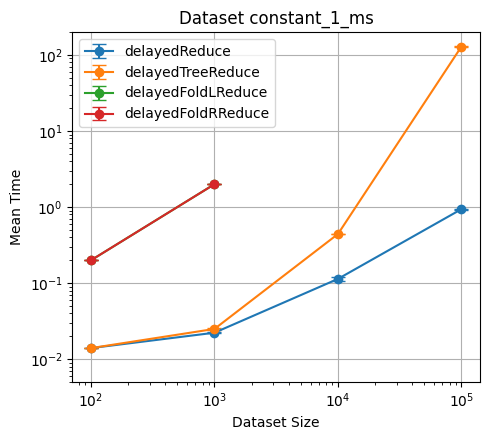

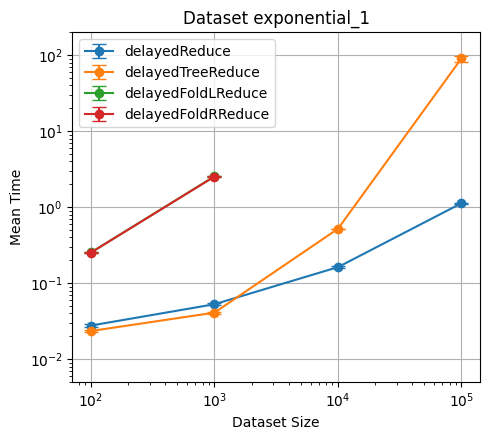

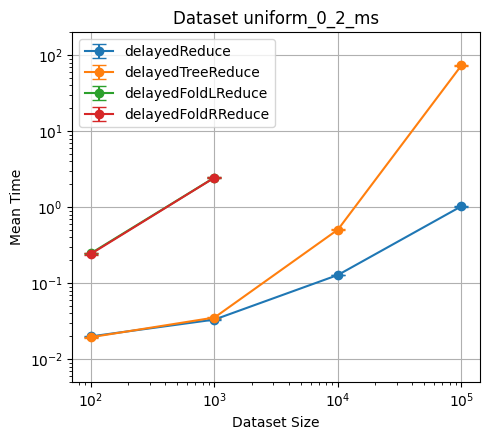

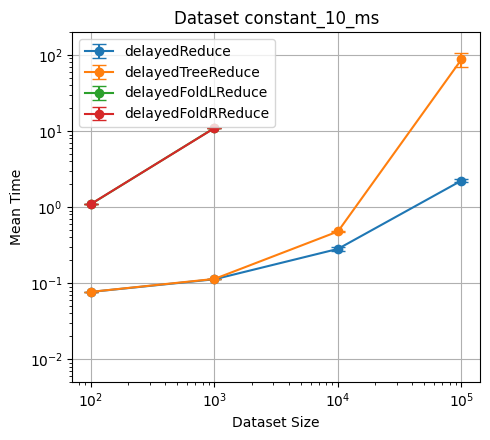

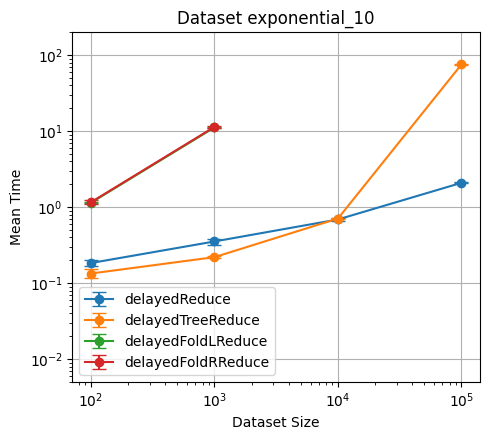

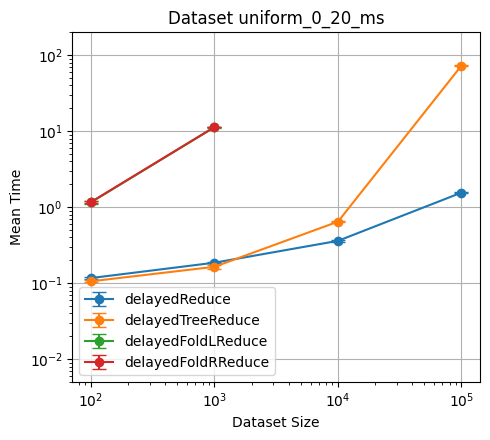

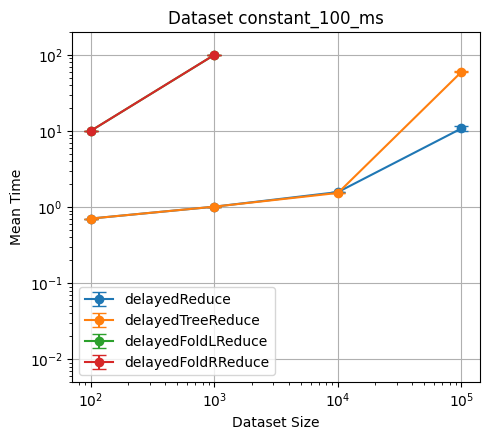

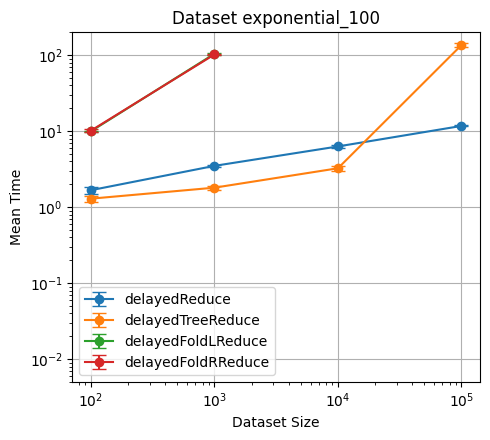

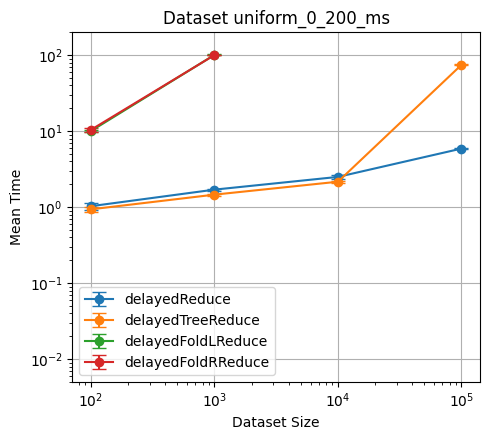

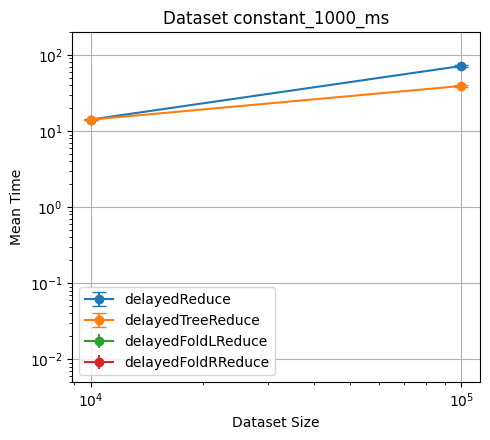

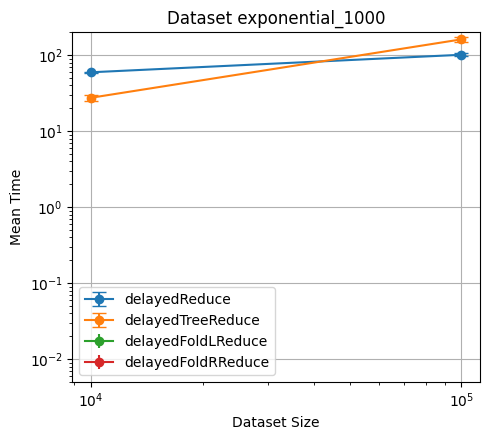

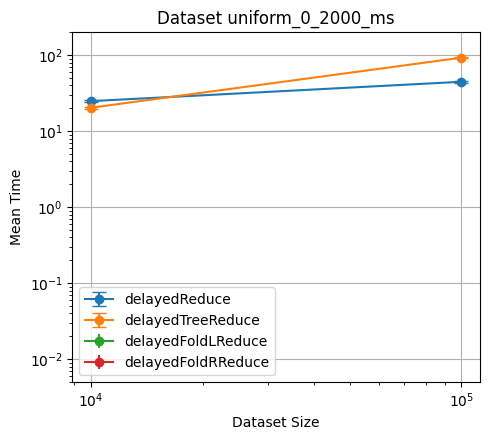

In [2]:
save_plots = False

# Load result csv file
df = pd.read_csv('results.csv') # Results file has columns: Name,Mean,MeanLB,MeanUB,Stddev,StddevLB,StddevUB

# Get dataset from name
datasets = ['short', 'medium', 'long', 'extreme']
dataset_to_size = {'short': 100, 'medium': 1000, 'long': 10000, 'extreme': 100000}
data_qualifier = ['_1_ms/','_10_ms/','_100_ms/','_1000_ms/', '_0_2_ms/','_0_200_ms/','_0_20_ms/','_0_2000_ms/','_1000/', '_100/', '_10/', '_1/']
distribution = ['uniform', 'constant', 'exponential']
algos = ['delayedReduce', 'delayedTreeReduce', 'delayedFoldLReduce', 'delayedFoldRReduce']
df['Dataset'] = df['Name'].apply(lambda x: next((d for d in datasets if d in x), None))
df['Size'] = df['Dataset'].apply(lambda x: dataset_to_size[x])
df['Qualifier'] = df['Name'].apply(lambda x: next((q for q in data_qualifier if q in x), None))
df['Qualifier'] = df['Qualifier'].apply(lambda x: x.replace('_ms', '')) # remove ms part
df['Qualifier'] = df['Qualifier'].apply(lambda x: x.replace('/', '')) # remove slash
df['Qualifier'] = df['Qualifier'].apply(lambda x: x.replace('0_2', '1')) # replace '0_2' with 1, '0_20' with 10, '0_200' with 100, '0_2000' with 1000
df['Full_name'] = df['Name'].apply(lambda x: x.split('/')[1]) # full name is part after first slash
df['Distribution'] = df['Name'].apply(lambda x: next((d for d in distribution if d in x), None))
df['Algo'] = df['Name'].apply(lambda x: next((a for a in algos if a in x), None))
df['Name'] = df['Name'].apply(lambda x: x.replace('benchmarks/', ''))


# We plot the results, where in the same graph we want to compare the different algorithms 
# with one subplot per qualifier-distribution combination, with a line for each algorithm
# On the x axis we have the dataset size, on the y axis the mean time, with error bars for the standard deviation


# Unique qualifier-distribution combinations
qual_dist_combinations = df[['Qualifier', 'Distribution']].drop_duplicates().sort_values(by=['Qualifier', 'Distribution'])

# Plot results for each combination separately
for qualifier, distribution in qual_dist_combinations.values:
    subset = df[(df['Qualifier'] == qualifier) & (df['Distribution'] == distribution)]
    full_names = subset['Full_name'].unique()
    
    plt.figure(figsize=(5, 4.5))
    for algo in algos:
        algo_data = subset[subset['Algo'] == algo]
        plt.errorbar(algo_data['Size'], algo_data['Mean'], yerr=algo_data['Stddev'], label=algo, marker='o', capsize=5)
    
    plt.title(f'Dataset {full_names[0]}')
    plt.xlabel('Dataset Size')
    plt.ylabel('Mean Time')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.5*10**-2, 2*10**2)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if save_plots:
        # Save plot as name
        plt.savefig(f'{qualifier}_{distribution}.png')

    plt.show()